# DS 4440: HW2

Due 10/1!

In [ ]:
import numpy as np # NumPy only!

## Q1. Implement the MLP class 

You *must* include `fit` and `predict` methods. You may (and probably should) of course implement other functions, as needed. 

In [ ]:
from sklearn.metrics import accuracy_score
def sigmoid(x):
    #sigmoid function
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    #derivative of sigmoid
    return sigmoid(x) * (1.0 - sigmoid(x))

class MLP:

    def __init__(self, input_size, hidden_dims=32, alpha=.002):
        '''
        Instantiate MLP using given parameters. 
        
        You may assume that there is only a single hidden layer
        (i.e., you need not generalize to handle arbitrary numbers of
        hidden layers).
        
        \alpha is the learning rate.
        '''
        self.hidden_dims = hidden_dims
        self.input_size = input_size
        self.learning_rate = alpha
  

    def predict(self, X):
        '''
        Yield predictions \hat{y} for instances X.
        '''
        h = np.dot(X,self.w1) + self.b1
        h = sigmoid(h)
        y_hat = np.dot(h,self.w2) + self.b2
        y_hat = sigmoid(y_hat)
        y_hat = np.where(y_hat >= 0.5, 1, 0)
        return y_hat


    def fit(self, X, y, epochs=1000, verbose=True, X_test = None, y_test = None):
        '''
        Train the model via backprop for the specified number of epochs.
        '''
        ##initialize the weights vectors
        self.input_size = X.shape[1]
        np.random.seed(100)
        self.w1 = np.random.randn(self.input_size,self.hidden_dims)
        self.w2 = np.random.randn(self.hidden_dims)

        self.b1 = np.random.randn(X.shape[0],self.hidden_dims)
        self.b2 = np.random.randn(y.shape[0])
        
        accuracies_train = [] 
        accuracies_test = []

        for epoch in range(epochs):
          h = np.dot(X,self.w1) + self.b1
          h_sig = sigmoid(h)
          y_hat = np.dot(h_sig,self.w2) + self.b2
          y_hat_sig = sigmoid(y_hat)

          ##calculate the gradients
          delta = sigmoid_prime(y_hat) *(y_hat_sig - y) 
          grad_b2 = self.learning_rate * delta
          grad_w2 = self.learning_rate * np.dot(h_sig.transpose(),delta)
          
          delta1 = np.zeros(self.b1.shape)
          for i in range(len(delta)):
            delta1[i] = self.learning_rate * np.dot(self.w2,delta[i])

          grad_b1 = delta1 * sigmoid_prime(h)
          grad_w1 = np.dot(X.transpose(),grad_b1)
          
          ##update w1,b1 for the MLP
          self.w1 -= grad_w1
          self.b1 -= grad_b1
          ##update w2,b2 for the MLP
          self.w2 -= grad_w2
          self.b2 -= grad_b2
          
          
          predict_train = self.predict(X)
          accuracy_train = accuracy_score(y,predict_train)
          accuracies_train.append(accuracy_train)
          
          if X_test.any:
            predict_test = self.predict(X_test)
            accuracy_test = accuracy_score(y_test,predict_test)
            accuracies_test.append(accuracy_test)
          
        return accuracies_train, accuracies_test
          

       
    
    

## Q2. Test the Implementation

You should: 



*  Use sklearn `make_classification` to create a simple dataset comprising 1000 samples -- be sure to include both informative and noisy features!
* Split this into equal sized disjoint train and test sets. 
* Instantiate your MLP and fit to the train data
* Instantiate the MLP defined in `sklearn.neural_network.MLP` (using same hyperparameters!) and fit to the train data.
* Make predictions for the test dataset using both models, generate metrics using `classification_report` from `sklearn`.
* Assert (by inspection is fine) that these models achieve comparable results (**Hint** the MLP may be sensitive to the number of epochs -- as per the following question.)


Sample output below -- feel free to elaborate. 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

X,y = make_classification(n_samples = 1000,n_repeated= 2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)
##generate my MLP
my_MLP = MLP(X_train[1])
##my MLP fit to the train data
accuracies_train, accuracies_test = my_MLP.fit(X_train,y_train,
                                               X_test=X_test,y_test=y_test)
##generate the sklearn.neural_network.MLP and fit to the train data
clf = MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train)
##make predictions
y_hat_clf = clf.predict(X_test)
my_y_hat = my_MLP.predict(X_test)
print("performance of sklearn implementation:")
print(classification_report(y_test, y_hat_clf))
print(accuracy_score(y_test,y_hat_clf))
print("performance of above MLP implementation:")
print(classification_report(y_test, my_y_hat))
print(accuracy_score(y_test,my_y_hat))


performance of sklearn implementation:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       258
           1       0.79      0.86      0.83       242

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500

0.826
performance of above MLP implementation:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       258
           1       0.81      0.87      0.84       242

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

0.836


## Q3 Exploring the bias-variance trade-off

#### A. 
Using `matplotlib` (see [here](https://https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=08RTGn_xE3MP)), plot train and test performances as a function of epochs

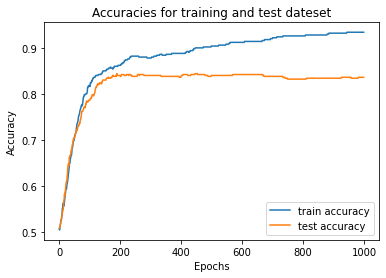

In [ ]:
import matplotlib.pyplot as plt
plt.plot(accuracies_train,label = "train accuracy")
plt.plot(accuracies_test,label = "test accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracies for training and test dateset")
plt.show()
    

#### B.
Let's see how additional hidden dims affect this (if at all)

In [ ]:
MLP16 = MLP(X_train[1],hidden_dims=16)
accuracies_train16, accuracies_test16 = MLP16.fit(X_train,y_train,
                                               X_test=X_test,y_test=y_test)
MLP256 = MLP(X_train[1],hidden_dims=256)
accuracies_train256, accuracies_test256 = MLP256.fit(X_train,y_train,
                                               X_test=X_test,y_test=y_test)


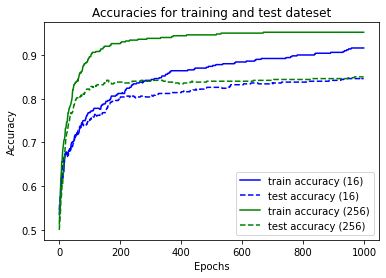

In [ ]:
plt.plot(accuracies_train16,'b',label = "train accuracy (16)")
plt.plot(accuracies_test16,'b',label = "test accuracy (16)",linestyle='dashed')
plt.plot(accuracies_train256,'g',label = "train accuracy (256)")
plt.plot(accuracies_test256,'g',label = "test accuracy (256)",linestyle='dashed')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracies for training and test dateset")
plt.show()

So we can see the overfitting is more pronounced when we have more dimensions (free parameters)

## Q4 Modify your implementation above to be a multi-class MLP

We recommend making a copy of your code above; you may see why in your implementation.

In [ ]:
class MMLP:

    def __init__(self, input_size, output_size, hidden_dims=32, alpha=.005):
        '''
        Instantiate MLP using given parameters. 
        
        You may assume that there is only a single hidden layer
        (i.e., you need not generalize to handle arbitrary numbers of
        hidden layers).
        
        \alpha is the learning rate.
        '''
        assert(output_size > 1)
        self.hidden_dims = hidden_dims
        self.input_size = input_size
        self.learning_rate = alpha
        self.output_size = output_size

    def predict(self, X):
        '''
        Yield predictions \hat{y} for instances X. To match the data generation 
        process, return the index of the highest performing class.
        '''
        h = np.dot(X,self.w1) + self.b1
        h = sigmoid(h)
        y_hat = np.dot(h,self.w2) + self.b2
        y_hat = sigmoid(y_hat)
        y_pred = np.argmax(y_hat, axis=1)
        return y_pred
      

    def fit(self, X, y, epochs=5000, verbose=True, X_test = None, y_test = None):
        '''
        Train the model via backprop for the specified number of epochs.
       
        '''
        ##initialize the weights vectors
        self.input_size = X.shape[1]
        np.random.seed(5)
        self.w1 = np.random.randn(self.input_size,self.hidden_dims)
        self.w2 = np.random.randn(self.hidden_dims,self.output_size)

        self.b1 = np.random.randn(X.shape[0],self.hidden_dims)
        self.b2 = np.random.randn(y.shape[0],self.output_size)
        
        accuracies_train = [] 
        accuracies_test = []

        for epoch in range(epochs):
          ##convert Y to multipe classes accordingly
          Y = []
          for i in range(self.output_size):
            Y.append(np.where(y == i, 1, 0))

          h = np.dot(X,self.w1) + self.b1
          h_sig = sigmoid(h)
          y_hat = np.dot(h_sig,self.w2) + self.b2
          y_hat_sig = sigmoid(y_hat)

          ##calculate the gradients
          delta = sigmoid_prime(y_hat.transpose()) *(y_hat_sig.transpose() - Y) 
          grad_b2 = self.learning_rate * delta
          grad_w2 = self.learning_rate * np.dot(delta,h_sig)
          
          delta1 = self.learning_rate * np.dot(self.w2,delta)

          grad_b1 = delta1.transpose() * sigmoid_prime(h)
          grad_w1 = np.dot(X.transpose(),grad_b1)
          
          ##update w1,b1 for the MLP
          self.w1 -= grad_w1
          self.b1 -= grad_b1
          ##update w2,b2 for the MLP
          self.w2 -= grad_w2.transpose()
          self.b2 -= grad_b2.transpose()
          
          
          predict_train = self.predict(X)
          accuracy_train = accuracy_score(y,predict_train)
          accuracies_train.append(accuracy_train)
          
          if X_test.any:
            predict_test = self.predict(X_test)
            accuracy_test = accuracy_score(y_test,predict_test)
            accuracies_test.append(accuracy_test)
          
        return accuracies_train, accuracies_test
        


## Q5 Implement Precision, Recall, micro-averaged F1, macro-averaged F1

In [ ]:
def cla_report(y,y_hat):
    classes = []
    for i in y:
      if i not in classes:
        classes.append(i)
    classes.sort()
    stats = np.zeros((len(classes),3))

    for a,b in zip(y,y_hat):
      index_b = classes.index(b)
      index_a = classes.index(a)
      if a == b:
        stats[index_b,:] += 1 
      else:
        stats[index_b,1] += 1
        stats[index_a,2] += 1

    precision = []
    recall = []
    macro_f1_ls = []
    sum = np.zeros(3)
    for j in range(len(classes)):
      p = stats[j,0]/stats[j,1]
      r = stats[j,0]/stats[j,2]

      precision.append([classes[j],round(p,2)])
      recall.append([classes[j],round(r,2)])
      sum += stats[j]
      macro_f1_ls.append(p*r*2/(p+r))

    total_precesion = sum[0] / sum[1]
    total_recell = sum[0] / sum[2]
    micro_f1 = 2 * total_precesion *total_recell / (total_precesion + total_recell)
    micro_f1 = round(micro_f1,2)
  
    macro_f1 = np.sum(macro_f1_ls) / len(macro_f1_ls)
    macro_f1 = round(macro_f1,2)

    return precision,recall,micro_f1,macro_f1




##test function
y1 = [0,0,0,0,1,1,1,2,2]
y2 = [0,0,1,2,1,1,2,1,2]
precision,recall,micro_f1,macro_f1 = cla_report(y1, y2)

print(precision,recall,micro_f1,macro_f1)

[[0, 1.0], [1, 0.5], [2, 0.33]] [[0, 0.5], [1, 0.67], [2, 0.5]] 0.56 0.55


## Q6 Explore the bias-variance trade-off for multi-class classification.

You should: 


*  Use sklearn `make_classification` to create a simple dataset comprising 2000 samples -- be sure to include both informative and noisy features! Use 5 classes for the moment.
* Split this into equal sized disjoint train and test sets. 
* Instantiate your MMLP and fit to the train data
* Explore bias/variance/precision/recall trade-offs as defined in the homework.

You might wish to check your model against `sklearn.neural_network.MLP` but we do not require this.

In [ ]:
X,y = make_classification(n_samples = 2000,n_repeated= 2, n_classes=5,n_informative=4)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)


##generate my MMLP
my_MMLP = MMLP(X_train[1],5)
##my MMLP fit to the train data
accuracies_train_MMLP, accuracies_test_MMLP = my_MMLP.fit(X_train,y_train,X_test=X_test,y_test=y_test)
y_hat = my_MMLP.predict(X_test)                                           


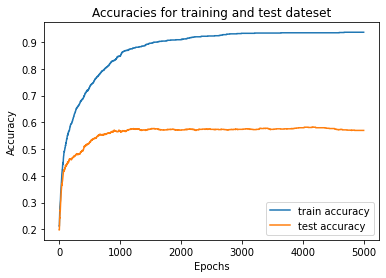

presions:
[[0, 0.54], [1, 0.64], [2, 0.54], [3, 0.58], [4, 0.55]]
recalls:
[[0, 0.53], [1, 0.78], [2, 0.53], [3, 0.55], [4, 0.48]]
micro_f1:
0.57
macro_f1:
0.57


In [ ]:
plt.plot(accuracies_train_MMLP,label = "train accuracy")
plt.plot(accuracies_test_MMLP,label = "test accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracies for training and test dateset")
plt.show()

precision,recall,micro_f1,macro_f1 = cla_report(y_test, y_hat)
print("presions:")
print(precision)
print("recalls:")
print(recall)
print("micro_f1:")
print(micro_f1)
print("macro_f1:")
print(macro_f1)

It looks like underfitting

In [ ]:
##generate my MMLP
my_MMLP_16 = MMLP(X_train[1],5,hidden_dims = 16)
##my MMLP fit to the train data
accuracies_train_MMLP_16, accuracies_test_MMLP_16 = my_MMLP_16.fit(X_train,y_train,X_test=X_test,y_test=y_test)
y_hat_16 = my_MMLP.predict(X_test)

                                               

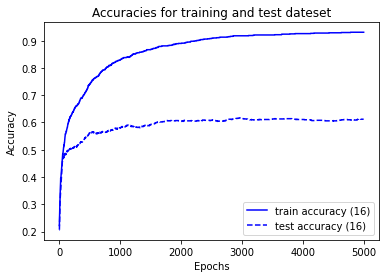

In [ ]:
plt.plot(accuracies_train_MMLP_16,'b',label = "train accuracy (16)")
plt.plot(accuracies_test_MMLP_16,'b',label = "test accuracy (16)",linestyle='dashed')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracies for training and test dateset")
plt.show()

In [ ]:
y_hat_16 = MMLP16.predict(X_test)
precision_16,recall_16,micro_f1_16,macro_f1_16 = cla_report(y_test, y_hat_16)
print("presions:")
print(precision_16)
print("recalls:")
print(recall_16)
print("micro_f1:")
print(micro_f1_16)
print("macro_f1:")
print(macro_f1_16)

presions:
[[0, 0.58], [1, 0.72], [2, 0.58], [3, 0.6], [4, 0.57]]
recalls:
[[0, 0.54], [1, 0.74], [2, 0.64], [3, 0.62], [4, 0.53]]
micro_f1:
0.61
macro_f1:
0.61


In [ ]:
##generate my MMLP
my_MMLP_256 = MMLP(X_train[1],5,hidden_dims = 256)
##my MMLP fit to the train data
accuracies_train_MMLP_256, accuracies_test_MMLP_256 = my_MMLP_256.fit(X_train,y_train,X_test=X_test,y_test=y_test)
y_hat_256 = my_MMLP.predict(X_test)


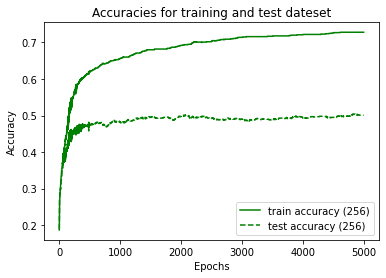

In [ ]:

plt.plot(accuracies_train_MMLP_256,'g',label = "train accuracy (256)")
plt.plot(accuracies_test_MMLP_256,'g',label = "test accuracy (256)",linestyle='dashed')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracies for training and test dateset")
plt.show()

In [ ]:
y_hat_256 = MMLP256.predict(X_test)
precision_256,recall_256,micro_f1_256,macro_f1_256 = cla_report(y_test, y_hat_256)
print("presions:")
print(precision_256)
print("recalls:")
print(recall_256)
print("micro_f1:")
print(micro_f1_256)
print("macro_f1:")
print(macro_f1_256)

presions:
[[0, 0.5], [1, 0.55], [2, nan], [3, 0.49], [4, 0.45]]
recalls:
[[0, 0.74], [1, 0.74], [2, 0.0], [3, 0.55], [4, 0.52]]
micro_f1:
0.5
macro_f1:
nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
